In [ ]:
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
import os
import numpy as np
import random as rn
import tensorflow as tf
import zipfile
import cv2
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json

# **Preparation code: dataset download**

In [ ]:
drive.mount('/content/drive', force_remount=True)
!kaggle datasets download -d parsasam/captcha-dataset

Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/parsasam/captcha-dataset
License(s): CC0-1.0
 97% 347M/356M [00:02<00:00, 133MB/s]
100% 356M/356M [00:02<00:00, 153MB/s]


In [ ]:
os.environ["PYTHONHASHSEED"] = "0"          # Setting the random seed for reproducibility
np.random.seed(150)
rn.seed(150)
tf.random.set_seed(150)

# **Dataset loading:**

In [ ]:
counter = 0

# Unzips a percentage of the images contained in 'zip_file'
def unzip_percentage(zip_file, percentage, output_dir):
    global counter
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        file_list = zip_ref.namelist()
        num_files_to_extract = int(len(file_list) * (percentage / 100))
        files_to_extract = rn.sample(file_list, num_files_to_extract)

        for file in files_to_extract:
            zip_ref.extract(file, output_dir)
            counter += 1
            if counter % 20000 == 0:
                print(f'Unzipped {counter} images...')


zip_file = '/content/captcha-dataset.zip'
output_dir = '/content/CAPTCHA'
percentage = 100

unzip_percentage(zip_file, percentage, output_dir)

print(f'Unzipped {counter} images...')
print('--------------------------------')
print(f'Total CAPTCHAs: {len(os.listdir(output_dir))}')

Unzipped 20000 images...
Unzipped 40000 images...
Unzipped 60000 images...
Unzipped 80000 images...
Unzipped 100000 images...
Unzipped 113062 images...
--------------------------------
Total CAPTCHAs: 113062


Converted 20000 images...
Converted 40000 images...
Converted 60000 images...
Converted 80000 images...
Converted 100000 images...
Total grayscale CAPTCHAs: 113062

Removed original images from /content/CAPTCHA


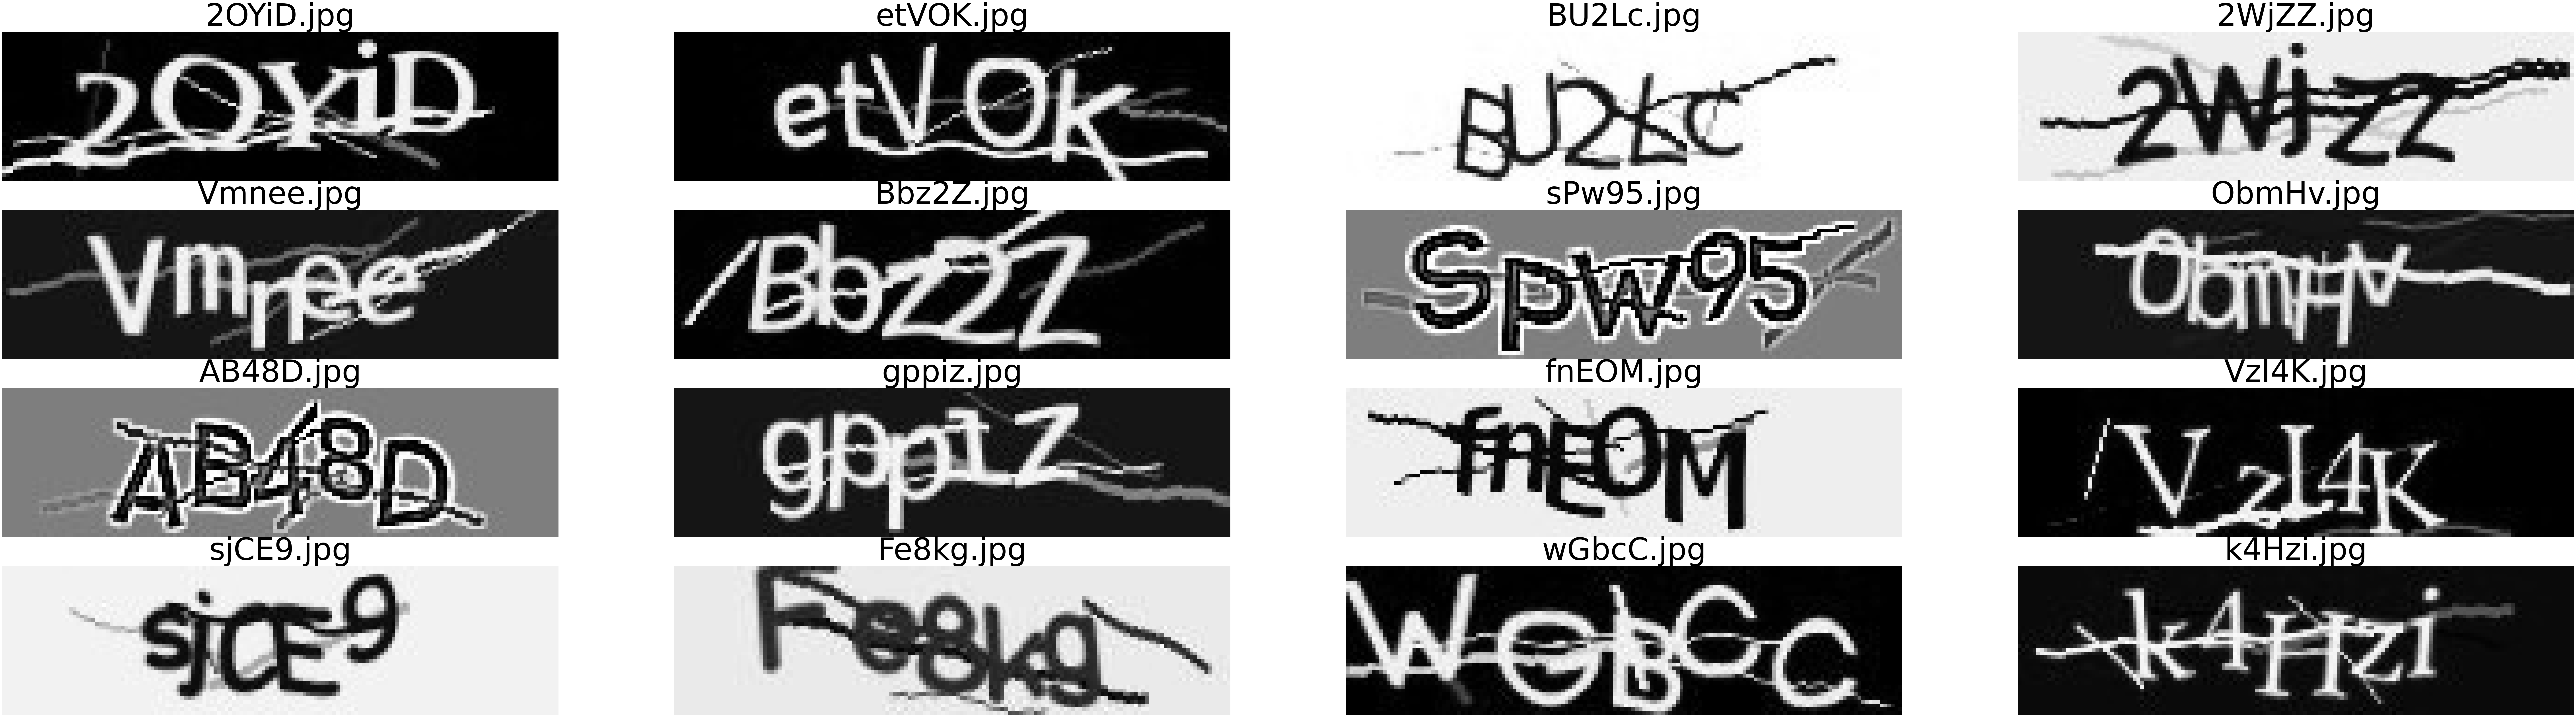

In [ ]:
def convert_images_to_grayscale(source_dir, dest_dir):
    if not os.path.exists(dest_dir):    # Create destination directory if it doesn't exist
        os.makedirs(dest_dir)

    counter = 0
    for filename in os.listdir(source_dir):  # Iterate over source directory
        file_path = os.path.join(source_dir, filename)
        save_path = os.path.join(dest_dir, filename)

        image = cv2.imread(file_path)  # Read image

        if image is not None:   # Image was read successfully
            counter += 1
            if counter % 20000 == 0:
                print(f'Converted {counter} images...')
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    # Convert image to grayscale
            cv2.imwrite(save_path, gray_image)      # Save the grayscale image to destination
        else:
            print(f"Could not read image: {file_path}")


def remove_original_images(source_dir):
    try:
        shutil.rmtree(source_dir)   # Remove the original images directory and its contents
        print(f"Removed original images from {source_dir}")
    except Exception as e:
        print(f"An error occurred: {e}")


source_dir = '/content/CAPTCHA'
dest_dir = '/content/CAPTCHA_grayscale'

convert_images_to_grayscale(source_dir, dest_dir)   # Convert images in source_dir to grayscale and save to dest_dir
print(f'Total grayscale CAPTCHAs: {len(os.listdir(dest_dir))}')
print()
remove_original_images(source_dir)      # Remove original images directory


try:
    files = os.listdir(dest_dir)
    fig, axes = plt.subplots(4, 4, figsize=(150, 40))       # Create 4x4 grid
    for i in range(4):
        for j in range(4):
            image_path = os.path.join(dest_dir, files[i * 4 + j])  # Get the path of
            img = mpimg.imread(image_path)   # Read image
            axes[i, j].imshow(img, cmap='gray')     # Display image grayscale
            axes[i, j].axis('off')
            axes[i, j].set_title(files[i * 4 + j], fontsize=100)     # Set the title
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

# **Image preprocessing:**

In [ ]:
root_folder = '/content/CAPTCHA_grayscale'

In [ ]:
# USEFUL VARIABLES AND CONSTANTS


# Extract all the chars that can be present in the CAPTCHAs
def extract_chars(path):
    char_list = []
    for filename in os.listdir(path):
        filename = os.path.splitext(filename)[0]
        char_list.extend(filename)
    char_list.sort()
    unique_chars = []
    for char in char_list:
        if char not in unique_chars:
            unique_chars.append(char)
    tot_chars = len(unique_chars)
    return tot_chars, unique_chars


TOT_CAPTCHA_CHARS, CAPTCHA_CHARS = extract_chars(root_folder)       #60 chars, 123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
TOTAL_SAMPLES = len(os.listdir(root_folder))
CAPTCHA_LENGTH = 5          # Tot chars in a CAPTCHA
CAPTCHA_CHARS_STRING = ''.join(CAPTCHA_CHARS)       # Concatenated CAPTCHA chars

print(CAPTCHA_CHARS_STRING)
print('CAPTCHA chars: ', CAPTCHA_CHARS)
print('Tot CAPTCHA chars: ', TOT_CAPTCHA_CHARS)
print('Total samples: ', TOTAL_SAMPLES)

123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnpqrstuvwxyz
CAPTCHA chars:  ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Tot CAPTCHA chars:  60
Total samples:  113062


In [ ]:
# IMAGE PREPROCESSING


IMAGE_HEIGHT = 40
IMAGE_WIDTH = 150
CHANNELS = 1  # Greyscale images

# Preprocess images to be used in the CNN
def preprocess_images(root_folder):
    TOTAL_SAMPLES = len(os.listdir(root_folder))            # Initialize arrays
    X_train = np.zeros((TOTAL_SAMPLES, IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS))
    y_train = np.zeros((CAPTCHA_LENGTH, TOTAL_SAMPLES, TOT_CAPTCHA_CHARS))

    for i, picture in enumerate(os.listdir(root_folder)):       # Process each image
        image_path = os.path.join(root_folder, picture)

        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    # Read image in grayscale
        if image is None:
            print(f"Warning: {picture} could not be read.")
            continue

        image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))    # Resize to the expected dimensions
        image = image / 255.0       # Normalize image
        image = np.reshape(image, (IMAGE_HEIGHT, IMAGE_WIDTH, 1))       # Reshape image

        label = os.path.splitext(picture)[0]        # Get the label from the filename

        target = np.zeros((CAPTCHA_LENGTH, TOT_CAPTCHA_CHARS))      # Initialize target array

        # Encode the label into one-hot format
        for letter, letter_index in enumerate(label):
            index = CAPTCHA_CHARS_STRING.find(letter_index)
            if index != -1:         # Make sure character is in the CAPTCHA_CHARS_STRING
                target[letter, index] = 1

        X_train[i] = image      # Assigning to X_train and y_train
        y_train[:, i] = target

    return X_train, y_train


root_folder = '/content/CAPTCHA_grayscale'
X_train, y_train = preprocess_images(root_folder)

In [ ]:
print('TRAINING SET')
print(f'Training images cardinality: {len(X_train)}')
print(f'Training images shape: {X_train.shape}')
print(f'Training labels shape: {y_train}')
print('-----------------------------------------------')

TRAINING SET
Training images cardinality: 113062
Training images shape: (113062, 40, 150, 1)
Training labels shape: [[[0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 1. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
-----------------------------------------------


# **First CNN architecture:**

In [ ]:
# MODEL ARCHITECTURE DEFINITION
img = keras.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS))

conv1 = layers.Conv2D(32, (3, 3), activation='relu')(img)
mp1 = layers.MaxPooling2D((2, 2))(conv1)

conv2 = layers.Conv2D(64, (3, 3), activation='relu')(mp1)
mp2 = layers.MaxPooling2D((2, 2))(conv2)

flat = layers.Flatten()(mp2)

dense1 = layers.Dense(128, activation='relu')(flat)

outputs = []
for _ in range(CAPTCHA_LENGTH):
    outputs.append(layers.Dense(TOT_CAPTCHA_CHARS, activation='softmax')(dense1))

model = keras.Model(inputs=img, outputs=outputs)

# MODEL COMPILATION
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] * CAPTCHA_LENGTH
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 40, 150, 1)     │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 38, 148, 32)    │            320 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 19, 74, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 17, 72, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 8, 36, 64)      │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 18432)          │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │      2,359,424 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 60)             │          7,740 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 60)             │          7,740 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 60)             │          7,740 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 60)             │          7,740 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 60)             │          7,740 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,416,940 (9.22 MB)

 Trainable params: 2,416,940 (9.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# MODEL FITTING

BATCH_SIZE = 32
EPOCHS = 30

history = model.fit(
    X_train,            # training images
    [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]],     # training labels, each output separately
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2,   # extraction of the validation set on the fly
    verbose=1
)

Epoch 1/30
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - dense_1_accuracy: 0.0778 - dense_2_accuracy: 0.0554 - dense_3_accuracy: 0.0533 - dense_4_accuracy: 0.0498 - dense_5_accuracy: 0.0603 - loss: 19.3339 - val_dense_1_accuracy: 0.2929 - val_dense_2_accuracy: 0.2146 - val_dense_3_accuracy: 0.1845 - val_dense_4_accuracy: 0.1760 - val_dense_5_accuracy: 0.2265 - val_loss: 14.8795
Epoch 2/30
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - dense_1_accuracy: 0.3207 - dense_2_accuracy: 0.2262 - dense_3_accuracy: 0.2085 - dense_4_accuracy: 0.1954 - dense_5_accuracy: 0.2611 - loss: 14.3662 - val_dense_1_accuracy: 0.3564 - val_dense_2_accuracy: 0.2766 - val_dense_3_accuracy: 0.2388 - val_dense_4_accuracy: 0.2270 - val_dense_5_accuracy: 0.2996 - val_loss: 13.6228
Epoch 3/30
2827/2827 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - dense_1_accuracy: 0.3887 - dense_2_accuracy: 0.2890 - dense_3_accuracy: 0.2627 - dense_4_accuracy: 0.2430 - dense_5_accuracy: 0.3317 - loss: 13.0529 - val_dense_1_accuracy: 0.3848 -

In [ ]:
# MODEL SAVING

saved_models = os.listdir("/content/drive/MyDrive/IS_project/models")
tot_saved_models = len(saved_models)

now = datetime.now()
date_time = now.strftime("%m-%d-%Y_%H-%M-%S")

model_name = "model_no_regularization_128_neurons-" + date_time + ".keras"

model.save(os.path.join("/content/drive/MyDrive/IS_project/models", model_name))

In [ ]:
history_dict = history.history
with open('/content/drive/MyDrive/IS_project/models/unregularized_history.json', 'w') as f:
    json.dump(history_dict, f)

In [ ]:
print(history.history.keys())

dict_keys(['dense_1_accuracy', 'dense_2_accuracy', 'dense_3_accuracy', 'dense_4_accuracy', 'dense_5_accuracy', 'loss', 'val_dense_1_accuracy', 'val_dense_2_accuracy', 'val_dense_3_accuracy', 'val_dense_4_accuracy', 'val_dense_5_accuracy', 'val_loss'])


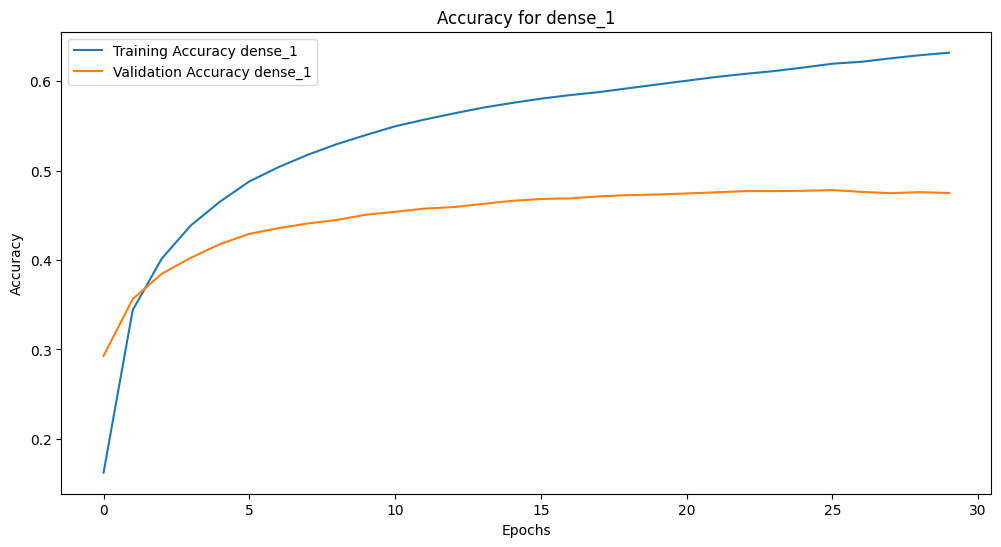

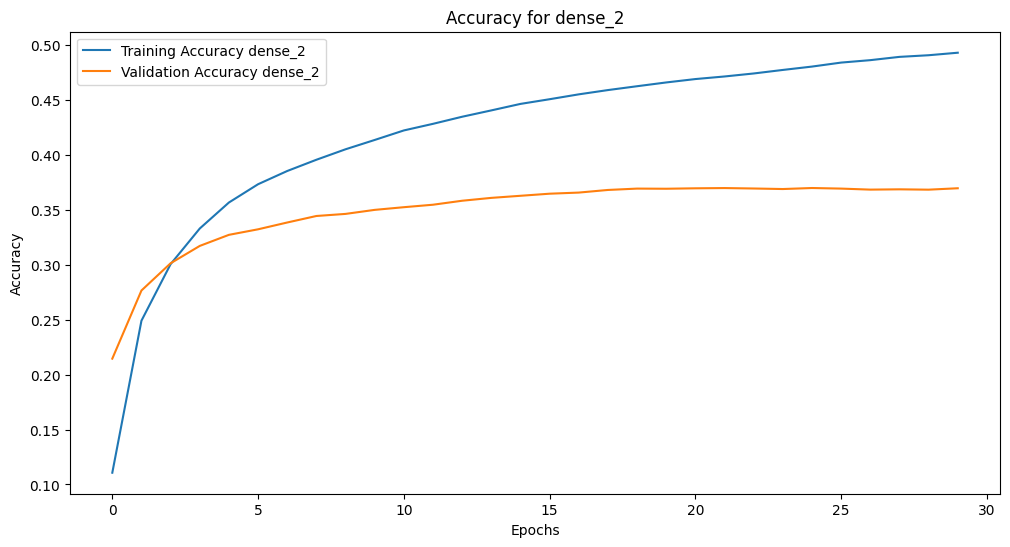

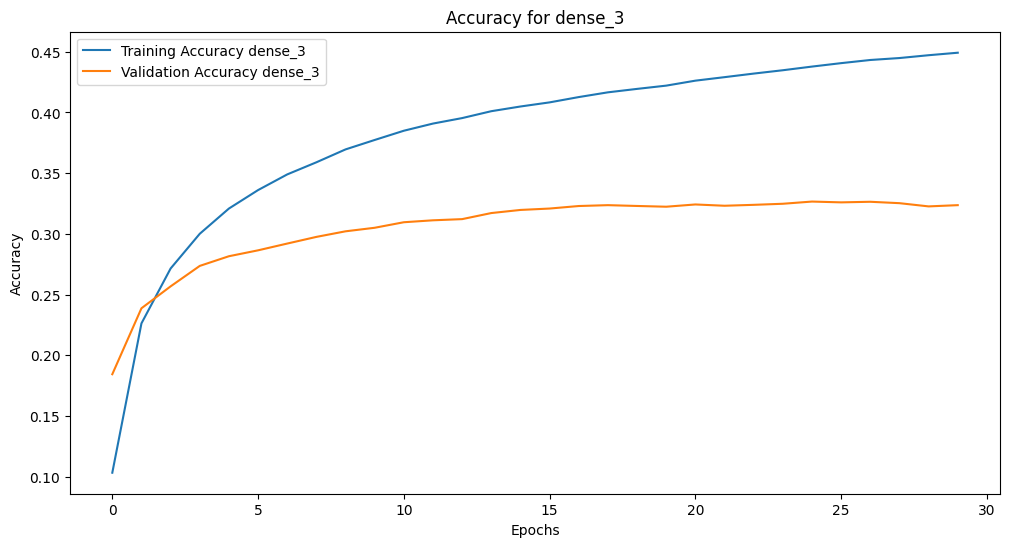

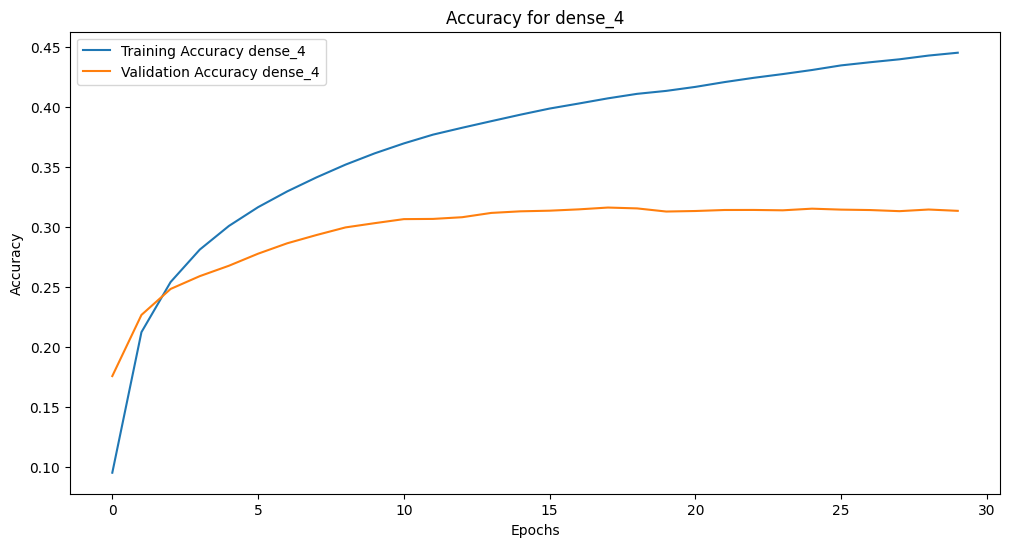

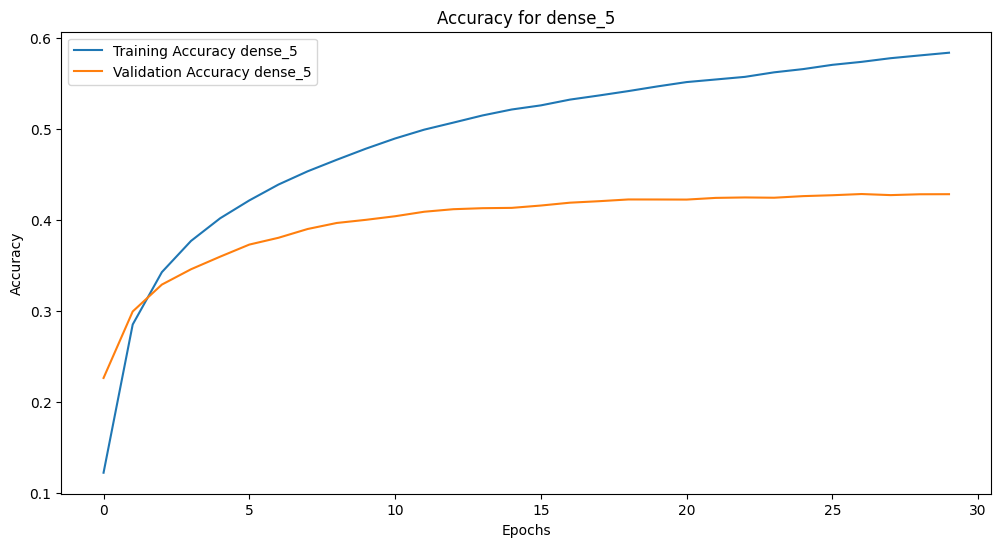

In [ ]:
# Plotting the accuracy of each output

for i in range(1, 6):
    output_name = f'dense_{i}'
    plt.figure(figsize=(12, 6))

    plt.plot(history.history[output_name + '_accuracy'], label=f'Training Accuracy {output_name}')      # Training accuracy

    plt.plot(history.history[f'val_{output_name}_accuracy'], label=f'Validation Accuracy {output_name}')        # Validation accuracy

    plt.title(f'Accuracy for {output_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

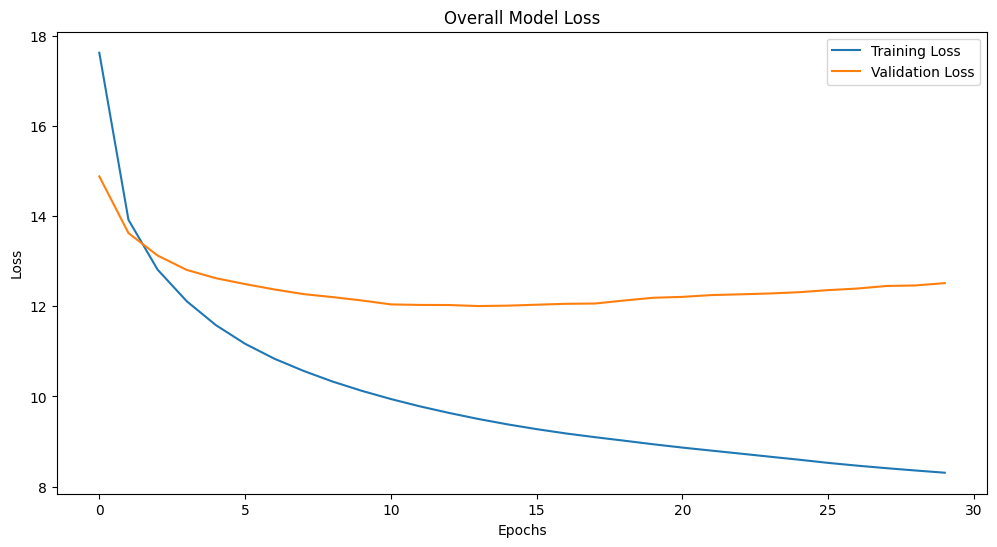

In [ ]:
# Plotting overall model loss

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Overall Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

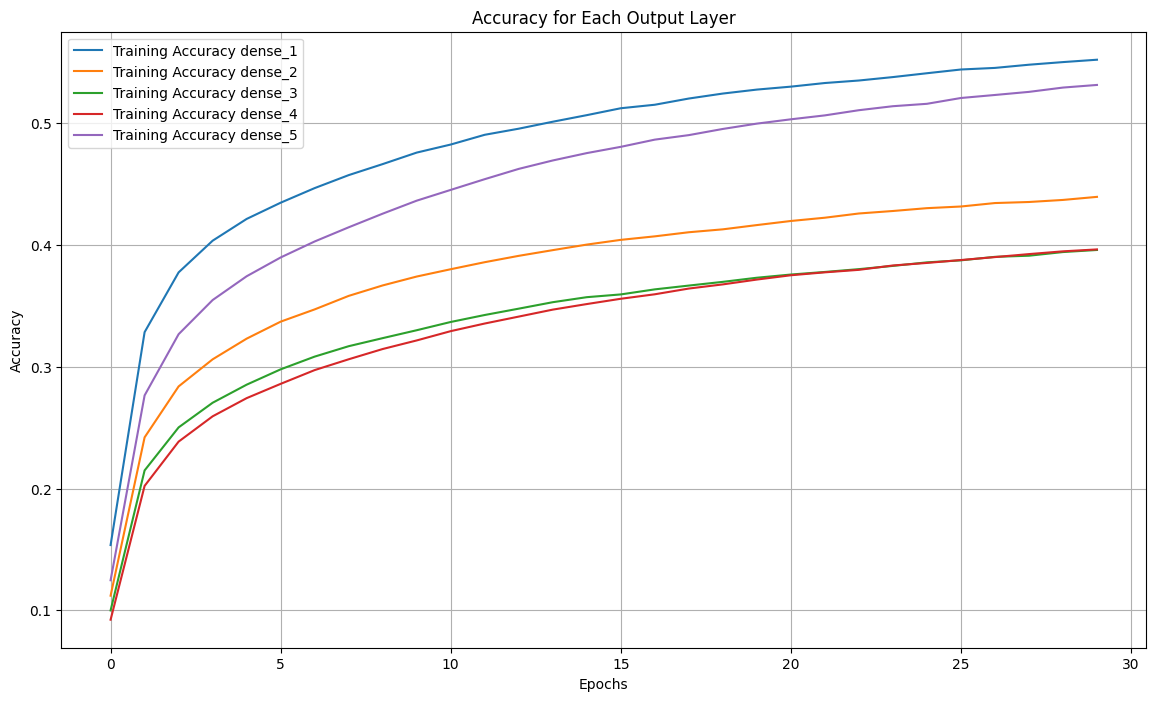

In [ ]:
output_layers = [1, 2, 3, 4, 5]  # Output layers IDs

# Plotting training accuracy for each output layer
plt.figure(figsize=(14, 8))
for i in output_layers:
    output_name = f'dense_{i}'

    plt.plot(history.history[f'{output_name}_accuracy'], label=f'Training Accuracy {output_name}')

plt.title('Accuracy for Each Output Layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()